# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr

# Step 2 - Load and prepare hazard data
Use xarray to load hazard data.\
If this data is not a two-dimensional array, perform your desired selection or calculation (eg mean, min, max, percentile) to reduce data to 2D.

In [3]:
# load some dataset
# for example, here we load BARPA rainfall data
filename = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/bias-adjustment-input/AGCD-05i/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/pr/pr_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_20150101-20151231.nc"
ds_pr = xr.open_dataset(filename)
ds_pr


<xarray.Dataset> Size: 894MB
Dimensions:    (time: 365, lat: 691, lon: 886, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2015-01-01T12:00:00 ... 2015-12-31T1...
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 894MB ...
    lat_bnds   (lat, bnds) float64 11kB ...
    lon_bnds   (lon, bnds) float64 14kB ...
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
Attributes: (12/46)
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               DD
    title:                     Pre-processed model output in preparation for ...
    source:                    ssp370 run using CSIRO-ARCCSS ACCESS-CM2 r4i1p...
    source_type:               ARCM
    project:                   BARPA
    ...                        ...
    references:                https://doi.org/10.25914/z1x6-dq28
    license:                   https://doi.org/10.25914/z1x6-dq28
    acknowledgement:           The production of BARPA was supported with fun...
    driving_experiment:        CSIRO-ARCCSS ACCESS-CM2; ssp370; r4i1p1f1
    driving_source_id:         ACCESS-CM2
    input_tracking_id:         62d5d07a-7da8-4bab-b5dc-ba08231c073d

In [4]:
# Calculate a 2D mappable data array
# this will be a mean, sum, median, percentile, min, max etc that will summarise the data in some way
# eg annual total rainfall
da_pr_ann = ds_pr.sum(dim="time").pr
da_pr_ann

<xarray.DataArray 'pr' (lat: 691, lon: 886)> Size: 2MB
array([[1154.9954, 1154.9285, 1154.8623, ..., 1099.7432, 1099.0704,
        1087.8168],
       [1153.061 , 1151.7704, 1150.4823, ..., 1102.0079, 1102.2352,
        1091.0404],
       [1148.3416, 1145.8315, 1143.3242, ..., 1089.335 , 1092.2421,
        1088.4784],
       ...,
       [2418.754 , 2457.3562, 2495.9563, ..., 2936.8723, 2952.2769,
        2981.1611],
       [2456.195 , 2483.0461, 2509.8877, ..., 2963.9734, 2982.4668,
        3017.6946],
       [2494.1797, 2510.0605, 2525.9373, ..., 2991.6794, 3013.2002,
        3053.0525]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2

# Step 3 - Plot
Use ```plot_acs_hazard``` to visualise the hazard on a map of Australia.

There are quite a few options to modify this plotting. At a minimum, you will need:
 - **data**, a 2D xarray.DataArray of your hazard
 - **regions**, use the regions_dict to access region or state boundary shape data
 - **title**, title of plot naming the index or hazard you are plotting
 - **date_range**, date range of the data you have plotted, appears as a subtitle under the title
 - **cmap**, use the cmap_dict to access a range of recommended colormaps
 - **ticks**, use the tick_dict to access a range of useful ranges or input your own list or array
 - **cbar_label**, is the label for the colorbar. Give name and unit
 - **cbar_extend**, controls the arrows of the colorbar. Indicates that values beyond the colorbar are possible. Use 'neither' for finite ranges eg deciles. Use 'both' for anomalies or temperatures. Use 'max' for total rainfall, where negative values are not possible, but very large positive values are possible. "min" is also an option.
 - **dataset_name**, name of the data source eg "AGCD v2", "BARPA-R ACCESS-CM2"
 - (**baseline**, If plotting anomalies, give the base period as a string, eg "1961-1990")

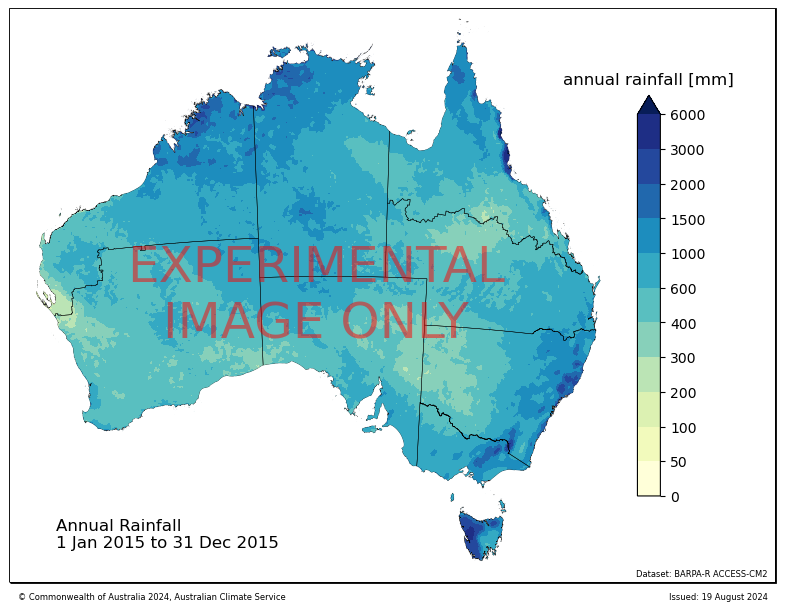

In [5]:
# Annual cumulative Rainfall
plot_acs_hazard(data = da_pr_ann,
                regions = regions_dict['ncra_regions'],
                title = "Annual Rainfall",
                date_range = "1 Jan 2015 to 31 Dec 2015",
                cmap = cmap_dict["pr"],
                ticks = tick_dict['pr_annual'],
                cbar_label = "annual rainfall [mm]",
                cbar_extend = "max",                
                dataset_name = "BARPA-R ACCESS-CM2",
                outfile = "figures/out.png");

## Step 4: Calculate NCRA region statistics

In [6]:
# import needed packages
from acs_area_statistics import acs_regional_stats, get_regions

regions = get_regions(["ncra_regions", "australia"])

In [7]:
# for Calculating the NCRA region stats, 
# we want to compare the regional averages based on different models, 
# eg what is the regional mean value from the coolest/driest model relisation, what is the mean, what is the regional mean from the hottest/wettest model
# for this, we want ds to have the 10th, median and 90th percentile values from each model, then we can find the range of the models and the MMM
# probably need ds to be a dataset with lat lon grid for all models and mean, 10th and 90th percentile values across time 
ds = ds_pr.sum(dim="time")

In [8]:
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = "fractional", 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


!warning very slow! Calculating fractional mask every time is very slow.         
Please consider calculating `mask = regions.mask_3D_frac_approx(ds)` before function.


<xarray.Dataset> Size: 2kB
Dimensions:  (region: 10)
Coordinates:
  * region   (region) int64 80B 0 1 2 3 4 5 6 7 8 9
    abbrevs  (region) <U8 320B 'WANorth' 'WASouth' 'NSW' ... 'QLDSouth' 'AUS'
    names    (region) <U48 2kB 'Western Australia North' ... 'Australia'
Data variables:
    pr_mean  (region) float64 80B 921.9 545.3 768.1 909.3 ... 766.4 584.2 742.7
    pr_min   (region) float32 40B 123.6 241.1 294.3 409.7 ... 264.4 283.1 123.6
    pr_max   (region) float32 40B 3.521e+03 2.042e+03 ... 1.7e+03 7.147e+03

# Access the docstring for more info

In [9]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='aus_states_territories',
    regions=None,
    data=None,
    station_df=None,
    stippling=None,
    mask_not_australia=True,
    facecolor=None,
    edgecolor='black',
    figsize=(8, 6),
    title=None,
    date_range='',
    crs=None,
    area_linewidth=0.3,
    xlim=(114, 162),
    ylim=(-43, -8),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x149b0b934fd0>,
    cbar_extend='both',
    ticks=None,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    label_states=False,
    contourf=False,
    contour=False,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    watermark_color='r',
    show_logo=False,
    infile=None,
    outfile=None,
    savefig=True,
)
Docstring:
This function takes a name of an Australian shapefile collection for data in 
/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/ 
and hazard data from a 2D Xarray data ar

In [10]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds=None,
    infile=None,
    var=None,
    mask=None,
    regions=<regionmask.Regions 'ncra_regions-australia'>
overlap:  True

Regions:
0  WANorth                          Western Australia North
1  WASouth                          Western Australia South
2      NSW New South Wales and Australian Capital Territory
3      VIC                                         Victoria
4       SA                                  South Australia
5      TAS                                         Tasmania
6       NT                               Northern Territory
7 QLDNorth                                 Queensland North
8 QLDSouth                                 Queensland South
9      AUS                                        Australia

[10 regions],
    start=None,
    end=None,
    dims=None,
    how=None,
    outfile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
    bins=None,
    bin_labels=None,
)
Docstring:
This function 